In [174]:
import pandas as pd
import numpy as npLinearRegression
from sklearn.linear_model import LinearRegression
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
from pylab import rcParams

# 1 Assignment

In [73]:
data = pd.read_csv('ds-boot-2.csv', sep='\t')
data.describe()

,id,p1,p2,p3,p4,p5,p6,p7,p8,p9,...,p24,p25,p26,p27,p28,y1,y2,y3,y4,y5
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,...,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,378.275000,6.264353,4.812500,6.106250,6.854167,6.537501,6.825000,6.768750,6.262501,6.516668,...,3.187500,3.722917,3.483333,3.916667,3.254167,4.025000,5.506250,7.306000,1.527500,5.634750
std,204.267545,3.168813,4.028246,3.210004,3.105559,3.114045,3.249140,3.144689,3.002584,3.585902,...,3.964980,4.055499,4.192620,4.339287,4.256550,2.857626,3.419161,2.956749,0.700848,2.811536
min,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,205.750000,5.458337,0.000000,4.375000,6.541665,6.000000,6.249998,6.374998,5.916667,5.375000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,7.277500,1.427500,4.155000
50%,414.500000,6.666670,4.000000,7.500000,7.666670,7.000000,8.000000,7.833335,7.000000,8.000000,...,1.333335,3.333335,0.000000,1.708335,0.000000,4.000000,6.250000,8.215000,1.865000,6.225000
75%,563.250000,8.726850,9.125000,8.500000,8.687503,9.000000,9.000000,8.812500,8.125000,9.000000,...,6.041667,6.625000,7.250002,8.541667,7.625000,6.500000,8.312500,9.072500,2.000000,8.025000
max,638.000000,10.000000,10.000000,10.000000,9.750000,10.000000,10.000000,10.000000,9.666670,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,11.000000,9.720000,2.000000,9.490000


In [20]:
X = list(filter(lambda x: "p" in x, list(data.columns)))
y = list(filter(lambda x: "y" in x, list(data.columns)))

## 1 Part

In [66]:
for target_col in y:
    bootstrapped_samples = np.random.choice(data.loc[:, target_col], size=(1000, len(data)))
    bs_mean = np.mean(bootstrapped_samples, axis=1)
    mean_mean = np.mean(bs_mean)
    mean_std = np.std(bs_mean)
    bs_median = np.median(bootstrapped_samples, axis=1)
    median_mean = np.mean(bs_median)
    median_std = np.std(bs_median)
    print("{} - mean: {:.2f}, se: {:.2f}, median: {:.2f}, se: {:.2f}".format(target_col, mean_mean, mean_std, median_mean, median_std))

y1 - mean: 4.04, se: 0.44, median: 4.04, se: 0.57
y2 - mean: 5.49, se: 0.55, median: 6.14, se: 0.71
y3 - mean: 7.31, se: 0.45, median: 8.31, se: 0.27
y4 - mean: 1.53, se: 0.11, median: 1.86, se: 0.13
y5 - mean: 5.62, se: 0.45, median: 6.16, se: 0.45


## 2 Part

In [106]:
data_X = data.loc[:, X]
data_y = data.loc[:, y]
bs_indices = np.random.choice(data.index, (1000, len(data)))
bs_X = data_X.values.take(bs_indices)
bs_y = data_y.values.take(bs_indices)

In [152]:
lr_coefs = np.zeros((1000, 5, 28))
lr_intercepts = np.zeros((1000, 5))
for i, bs_indices in enumerate(np.random.choice(data.index, (1000, len(data)))):
    bs_X, bs_y = data_X.loc[bs_indices, :], data_y.loc[bs_indices, :]
    lr = LinearRegression(n_jobs=4)
    lr.fit(bs_X, bs_y)
    lr_coefs[i] = lr.coef_
    lr_intercepts[i] = lr.intercept_

In [162]:
st.norm.interval(0.95, loc=np.mean(lr_coefs, axis=0), scale=np.std(lr_coefs, axis=0)/np.sqrt(len(data)))
# First array - lower bounds of confidence interval for each coefficient for each target
# Second array - upper bounds of confidence interval for each coefficient for each target

(array([[ 0.18005668, -0.12646058, -0.21400002,  0.44221329, -0.37265687,
          0.06380368, -0.54673852, -0.19587121, -0.16954088, -0.28672845,
          0.20523317, -0.0664307 ,  0.00183498, -0.13350722, -0.52840999,
          0.13008917,  0.20579194, -0.15188202, -0.32897764, -0.27101463,
          0.25782542, -0.10240442,  0.28684933, -0.34260062,  0.06178445,
         -0.09214886, -0.11405409, -0.22721276],
        [-0.21974733, -0.01628513, -0.25647426,  0.00685974, -0.11307141,
          0.26442409,  0.15409252, -0.55669284, -0.19420853, -0.21125941,
          0.01598793, -0.12383563, -0.22434056,  0.04007242, -0.5010427 ,
          0.08474459,  0.07477729, -0.08887345, -0.46350503, -0.31341882,
          0.20916098,  0.0793426 , -0.20468658, -0.14854306, -0.06889403,
          0.10795834, -0.42202927, -0.29284987],
        [-0.00641423,  0.01342737,  0.02383612,  0.04751407,  0.07032739,
         -0.0627537 ,  0.10940866,  0.09695485,  0.04049569,  0.02095867,
          0.09

In [163]:
st.norm.interval(0.95, loc=np.mean(lr_intercepts, axis=0), scale=np.std(lr_intercepts, axis=0)/np.sqrt(len(data)))
# First array lower bounds of confidence interval of intercept for each target
# Second array upper bounds of confidence interval of intercept for each target

(array([-0.19354016, -0.18897372, -0.04743546, -0.02317364, -0.07863451]),
 array([ 0.11860362,  0.15229873,  0.07884987,  0.03727556,  0.05439193]))

# 2 Assignment

In [170]:
data = pd.read_csv('ds-boot-1.csv', sep='\t').set_index('day')
data.head()

,bugsPerDay,cummBugs
day,,
1,0,0
2,1,1
3,0,1
4,2,3
5,1,4


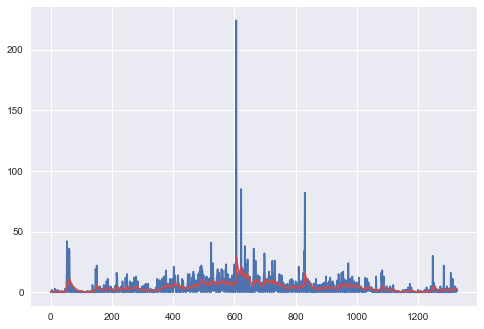

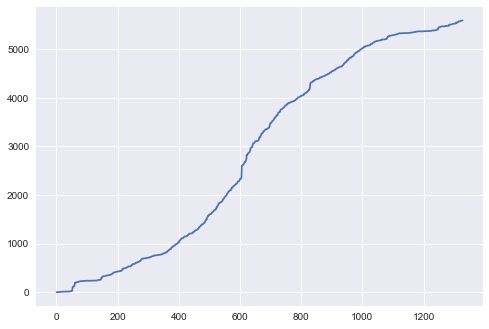

In [187]:
plt.plot(data['bugsPerDay'])
plt.plot(data['bugsPerDay'].ewm(span=20).mean(), 'r')
plt.show()
plt.plot(data['cummBugs'])
plt.show()